In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch

In [45]:
def set_plot_basicinf(ylabel,xlabel,fontsize=14):
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
fontsize=14

## Validation for Self-similarity

In [46]:

T = 100 # evolution time
dt = 1  # step interval
steps = int(T/dt)
space = np.arange(0,100,1)
D =0.5 # diffusion coefficient
L = len(space) # space length
repeats = 1
pt = np.zeros([repeats,steps,L])


for r in range(repeats):
    center = L//2 #initalize position
    pt[r,0,center] = 1
    
    for step in range(steps-1):
        step = step+1
        pt[r,step,:] = 1/(np.sqrt(4*np.pi*D*step)) * np.exp(-(space-center)**2/(4*D*step))
pt = torch.tensor(pt[0,:,:],dtype=torch.float)
pt.shape

torch.Size([100, 100])

In [54]:
def MAE(pred, data):
    return torch.mean(abs(pred - data))
def MSE(pred, data):
    return torch.mean(torch.pow(pred - data, 2))

In [55]:
seeds = [2050,2051]
kernels = [3,5,7,9]
kernel_mae1 = np.zeros([len(seeds),len(kernels)])
for i,seed in enumerate(seeds):
#     kernel_mae[seed] = []
    for j,kernel in enumerate(kernels):
        dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel}_{seed}.pth')
        pt = torch.tensor(pt,dtype=torch.float)
        pred = dynamic(pt)
#         mae = MAE(pred[:-1],pt[1:]).item()
        mae = MSE(pred[:-1],pt[1:]).item()
        print(mae)
        kernel_mae1[i,j] = mae

1.5109322930584312e-06
1.0704388841986656e-07
2.2863122239868972e-07
3.379780935119925e-07
1.5109345667951857e-06
1.0707642417173702e-07
2.2863056869937282e-07
3.3797684295677755e-07


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [56]:
seeds = [2050]
kernels = [3,5,7,9]
s_group_datas = [1,3,5,10]
kernel_mae2 = np.zeros([len(s_group_datas),len(seeds),len(kernels)])
for k,s_group_data in enumerate(s_group_datas):
    with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group_data}_center.pkl','rb') as f:
        data = pkl.load(f)[0,:,:] #b*t*L
    for i,seed in enumerate(seeds):
    #     kernel_mae[seed] = []
        for j,kernel in enumerate(kernels):
            dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={s_group_data}_k={kernel}_{seed}.pth')
            data = torch.tensor(data,dtype=torch.float)
            pred = dynamic(data)
#             mae = MAE(pred[:-1],data[1:]).item()
            mae = MSE(pred[:-1],data[1:]).item()
#             print(mae)
            kernel_mae2[k,i,j] = mae



/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == "":


In [57]:
colors = sns.color_palette('GnBu_r',6)#autumn
colors

[(0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042)]

## kernel size versus prediction accurcy

torch.Size([100, 100])


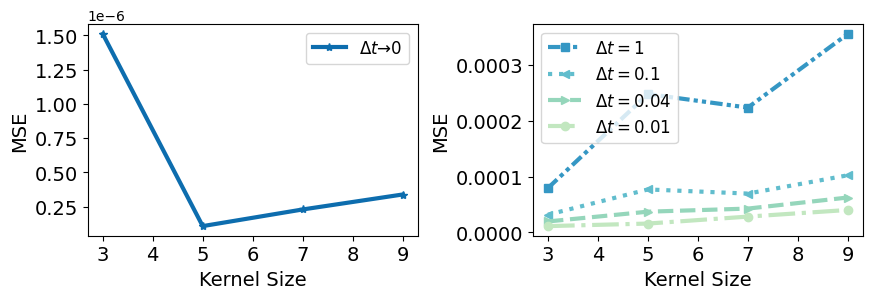

In [61]:

print(data.shape)
dic = {1:1,3:0.1,5:0.04,10:0.01}
plt.figure(dpi=100,figsize=(10,2.8))
plt.subplots_adjust(wspace=0.35)
plt.subplot(121)
plt.plot(kernels,np.mean(kernel_mae1,axis=0),marker='*',linewidth=3,color=colors[0],label=r'$\Delta t \to 0$')
plt.fill_between(kernels,y1=np.min(kernel_mae1,axis=0),y2=np.max(kernel_mae1,axis=0),alpha=0.1,color=colors[0])
# plt.yscale('log')
plt.legend(fontsize=fontsize-2)
# plt.yticks([0.00002,0.00004,0.00006,0.00008,0.0001],[r'$2x10^{-5}$',r'$4x10^{-5}$',r'$6x10^{-5}$',r'$8x10^{-5}$',r'$10x10^{-5}$'])
set_plot_basicinf('MSE','Kernel Size',fontsize)
# plt.ylim(1e-5,1.2e-4)

plt.subplot(122)

markers = ['s','<','>','o']
linestyles = [(0,(3,1,1,1,1,1)),'dotted','dashed','dashdot']
for k,s_group_data in enumerate(s_group_datas):
    plt.plot(kernels,np.mean(kernel_mae2[k,:,:],axis=0),linewidth=3,marker=markers[k],linestyle=linestyles[k],color=colors[k+1],label=r'$\Delta t = $'+f'{dic[s_group_data]}')
set_plot_basicinf('MSE','Kernel Size',fontsize)
# plt.yticks([0.001,0.003,0.005,0.007])
plt.legend(fontsize=fontsize-2)
plt.show()
# plt.title(r'',fontsize=fontsize)

In [62]:
seeds = [2050]
kernels = [3,5,7,9]
s_group_datas = [1,3,5,10]
kernel_mae2 = np.zeros([len(s_group_datas),len(seeds),len(kernels)])
kernel_mae3 = np.zeros([len(s_group_datas),len(seeds),len(kernels)])
for k,s_group_data in enumerate(s_group_datas):
    sgroup = 2
    tgroup = 4
    with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group_data}_center.pkl','rb') as f:
        data = pkl.load(f)[0,:,:] #b*t*L
    for i,seed in enumerate(seeds):
    #     kernel_mae[seed] = []
        for j,kernel in enumerate(kernels):
            dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={s_group_data}_k={kernel}_{seed}.pth')
            model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={s_group_data}_{seed}.pth')
            data = torch.tensor(data,dtype=torch.float)
#             pred = dynamic(data)
#             mae = MAE(pred[:-1],data[1:]).item()
#             print(mae)
            'single单步粗粒化'
            encoder = model.Encoder(data.unsqueeze(0))
            macro_preds = dynamic(encoder[0,:,:])
#             mae = MAE((macro_preds[:-1].reshape(-1)),(encoder[0,1:,:].reshape(-1))).item()
            mae = MSE((macro_preds[:-1].reshape(-1)),(encoder[0,1:,:].reshape(-1))).item()
            kernel_mae2[k,i,j] = mae
            
            decoder = model.Decoder(macro_preds.unsqueeze(0))[0,:,:]
#             mae = MAE((decoder[:-1].reshape(-1)),(data[1:,:].reshape(-1))).item()
            mae = MSE((macro_preds[:-1].reshape(-1)),(encoder[0,1:,:].reshape(-1))).item()
            kernel_mae3[k,i,j] = mae

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


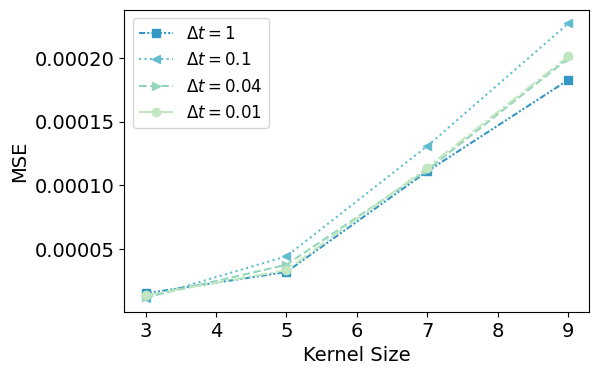

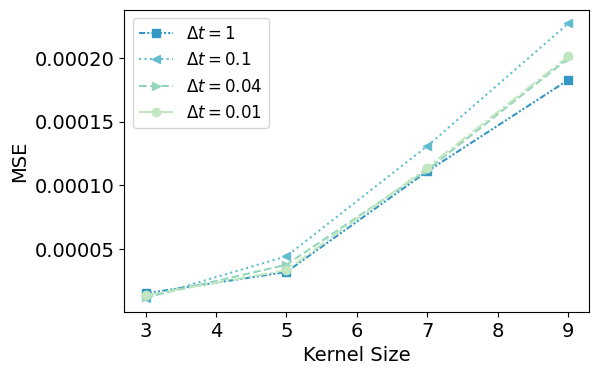

In [64]:
plt.figure(dpi=100)
dic = {1:1,3:0.1,5:0.04,10:0.01}
markers = ['s','<','>','o']
linestyles = [(0,(3,1,1,1,1,1)),'dotted','dashed','dashdot']
for k,s_group_data in enumerate(s_group_datas):
    plt.plot(kernels,np.mean(kernel_mae2[k,:,:],axis=0),marker=markers[k],linestyle=linestyles[k],color=colors[k+1],label=r'$\Delta t = $'+f'{dic[s_group_data]}')
set_plot_basicinf('MSE','Kernel Size')
plt.legend(fontsize=fontsize-2)
plt.show()
# plt.title(
plt.figure(dpi=100)
dic = {1:1,3:0.1,5:0.04,10:0.01}
markers = ['s','<','>','o']
linestyles = [(0,(3,1,1,1,1,1)),'dotted','dashed','dashdot']
for k,s_group_data in enumerate(s_group_datas):
    plt.plot(kernels,np.mean(kernel_mae3[k,:,:],axis=0),marker=markers[k],linestyle=linestyles[k],color=colors[k+1],label=r'$\Delta t = $'+f'{dic[s_group_data]}')
set_plot_basicinf('MSE','Kernel Size')
plt.legend(fontsize=fontsize-2)
plt.show()
# plt.title(

In [65]:
# 'decoder'

# decoder = model.Decoder(macro_preds.unsqueeze(0))
# #     print(decoder.shape)
# mae = MAE((decoder[0,:-1].reshape(-1)),(data[1:,:].reshape(-1))).item()
# decoder_maes.append(mae)

tensor(1.0000)

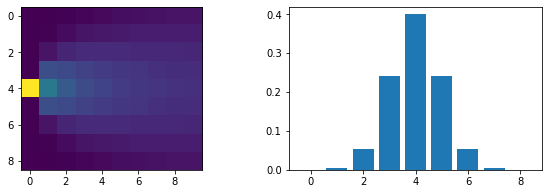

In [66]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(pt[:10,46:55].T)
plt.subplot(122)
plt.bar(range(9),pt[1,46:55])
sum(pt[10,:])

In [67]:
sgroup=2
tgroup=2
seed = 2051
# model = torch.load(f'./models/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}.pth')
model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}_k=7.pth')
# dynamic = torch.load(f'./models/diffusion_dynamic_no_norm_kernel.pth')
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k=7_{seed}.pth')
dynamic.eval()

Diffusion1D(
  (normconv): NormalizedConv1d(
    (conv): Conv1d(1, 1, kernel_size=(7,), stride=(1,), padding=same, bias=False)
    (softmax): Softmax(dim=-1)
  )
  (relu): ReLU()
)

In [68]:
'single step 预测'

pred = dynamic(pt)
pt.shape,pred.shape
print('1 step MAE: ',torch.mean(abs(pred[:-1,:].detach()-pt[1:,:].detach())))

1 step MAE:  tensor(6.4016e-05)


In [69]:
'muti step 预测'
pred_steps = 100
L=100
multi_pred = torch.zeros(pt.shape)
multi_pred[0:1,:] = dynamic(pt[0:1,:])
for step in range(pred_steps):
    multi_pred[step+1:step+2,:] = dynamic(multi_pred[step:step+1,:])


[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


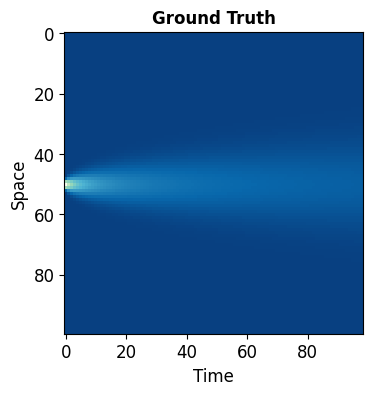

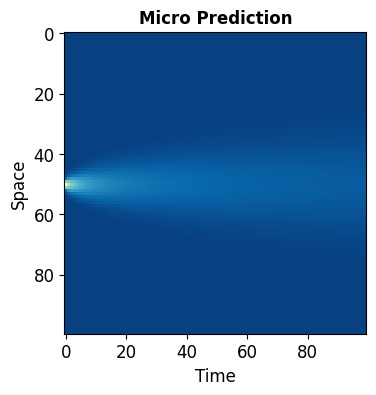

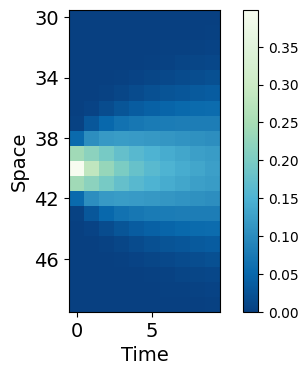

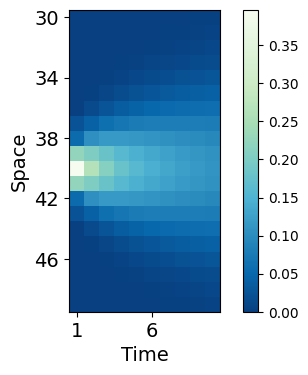

In [70]:
plt.figure(dpi=100)
fontsize=12
# cmap = mpl.colors.ListedColormap(colors)
# plt.subplot(121)
plt.imshow(pt[1:,:].T,cmap='GnBu_r')
# plt.colorbar()
plt.title('Data')
set_plot_basicinf('Space','Time',fontsize)
plt.title('Ground Truth',fontsize=fontsize,fontweight='bold')

plt.figure(dpi=100)
plt.imshow(multi_pred.detach().T,cmap='GnBu_r')
set_plot_basicinf('Space','Time',fontsize)
plt.title('Micro Prediction',fontsize=fontsize,fontweight='bold')
# plt.colorbar()
plt.show()


plt.figure(dpi=100)
# cmap = mpl.colors.ListedColormap(colors)
# plt.subplot(121)
fontsize=14
plt.imshow(pt[1:11,40:60].T,cmap='GnBu_r')
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.yticks(np.arange(0,20,4),[str(i) for i in np.arange(30,50,4)])
# plt.title('Data',fontsize=fontsize,fontweight='bold')
# plt.subplot(122)
plt.figure(dpi=100)
plt.imshow(multi_pred.detach()[:10,40:60].T,cmap='GnBu_r')
plt.colorbar()
plt.yticks(np.arange(0,20,4),[str(i) for i in np.arange(30,50,4)])
plt.xticks([0,5],['1','6'])
set_plot_basicinf('Space','Time',fontsize)
# plt.title('Micro Prediction',fontsize=fontsize,fontweight='bold')
# plt.colorbar()
plt.show()




In [71]:
pt.shape,multi_pred.shape

(torch.Size([100, 100]), torch.Size([100, 100]))

In [72]:
print('100 step MAE: ',torch.mean(abs(multi_pred[:-1,:].detach()-pt[1:,:].detach())))

100 step MAE:  tensor(0.0013)


In [73]:
'single单步粗粒化'
encoder = model.Encoder(pt[:-1,:].unsqueeze(0))
encoder1 = model.Encoder(pt[1:,:].unsqueeze(0))
print(pt.shape,encoder.shape)
macro_preds = dynamic(encoder[0,:,:])
macro_preds.shape

torch.Size([100, 100]) torch.Size([1, 49, 50])


torch.Size([49, 50])

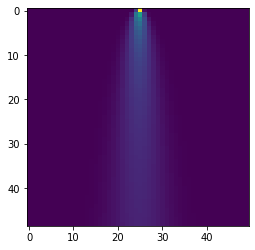

In [74]:
plt.imshow(encoder.detach()[0,:,:])

In [75]:
print('MAE: ',torch.sum(abs(macro_preds.detach()-encoder1[0,:,:].detach())))

MAE:  tensor(3.5451)


In [76]:
'多步粗粒化——这还挺复杂的，涉及到宏观多步和微观多步——动力学一致性'
encoder = model.Encoder(pt.unsqueeze(0))
encoder1 = model.Encoder(multi_pred.unsqueeze(0))
print(encoder.shape)
pred_steps = 50
macro_preds = torch.zeros(encoder.shape)[0,:,:]
b,t,l = encoder.shape
macro_preds[0:1,:] = dynamic(encoder[:,0:1,:].reshape(-1,l)).reshape(1,l)
for step in range(pred_steps):
    macro_preds[step+1:step+2] = dynamic(macro_preds[step:step+1,:])
encoder1.shape,macro_preds.shape

torch.Size([1, 50, 50])


(torch.Size([1, 50, 50]), torch.Size([50, 50]))

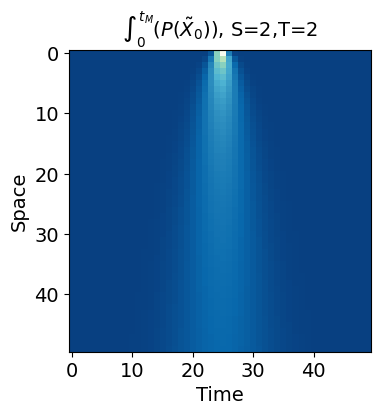

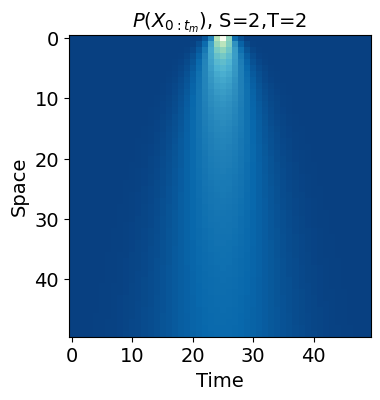

In [77]:
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(encoder1[0,:,:].detach(),cmap='GnBu_r')
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'$\int_0^{t_M}(P (\tilde{X}_0))$'+f', S={sgroup},T={tgroup}',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(macro_preds.detach()[:,:],cmap='GnBu_r')
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"$P ({X}_{0:t_m})$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()

In [78]:
print('MAE: ',torch.sum(abs(macro_preds[:,:].detach()-encoder1[0,:,:].detach())))

MAE:  tensor(17.0886)


In [79]:
from scipy.stats import linregress

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


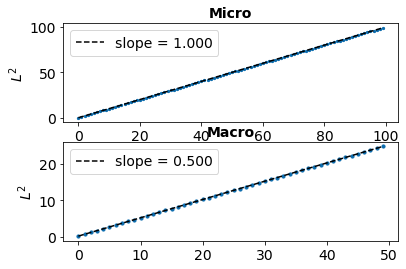

In [80]:
def get_distance_VS_t(data):
    b,steps,L = data.shape
    center = L // 2
    msds = np.zeros([b,steps])
#     print(msds.shape)
    for b in range(data.shape[0]):
        msds[b,:] = np.array([np.sum((abs(np.where(data[b,i,:]!= 0)[0]-center)**2)*data[b,i, np.where(data[b,i,:]!= 0)[0]]) for i in range(data.shape[1])])
#     print(msds.shape)
    return steps,msds

plt.subplot(211)
steps,msds = get_distance_VS_t(np.array(pt.unsqueeze(0)))
yy = np.mean(msds,axis=0)
plt.scatter(range(steps), yy,s=1)

slope, intercept, r_value, p_value, std_err = linregress(range(steps), yy[:steps])
plt.scatter(range(steps), yy[:steps],color=colors[0],s=5)
plt.plot(range(steps), range(steps) * slope + intercept, '--',color='k',label=f'slope = {slope:.3f}')
#     if idx == 0:
set_plot_basicinf(r'$L^2$','',fontsize)
#     else:
#         set_plot_basicinf(r'','Time',fontsize)
plt.title('Micro',fontsize=fontsize,fontweight='bold')
plt.legend(fontsize=fontsize,loc=2)



plt.subplot(212)
data = torch.tensor(pt.unsqueeze(0),dtype=torch.float)
encoder = model.Encoder(data)
steps,msds = get_distance_VS_t(np.array(encoder.detach()))
yy = np.mean(msds,axis=0)
plt.scatter(range(steps), yy,s=1)

slope, intercept, r_value, p_value, std_err = linregress(range(steps), yy[:steps])
plt.scatter(range(steps), yy[:steps],color=colors[0],s=10)
plt.plot(range(steps), range(steps) * slope + intercept, '--',color='k',label=f'slope = {slope:.3f}')
#     set_plot_basicinf(r'$L^2$','Time',fontsize)
if idx == 0:
    set_plot_basicinf(r'$L^2$','',fontsize)
else:
    set_plot_basicinf(r'','Time',fontsize)
plt.title('Macro',fontsize=fontsize,fontweight='bold')
plt.legend(fontsize=fontsize)
plt.show()

### '非自相似测试-离散版本'

In [81]:
import torch.nn.functional as F

class NormalizedConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size,padding,padding_mode):
        super(NormalizedConv1d, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding, padding_mode, bias=False)
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, x):
        # 对权重进行归一化
        normed_weight = self.softmax(self.conv.weight)
        return F.conv1d(x, normed_weight, self.conv.bias, stride=self.conv.stride,
                        padding=self.conv.padding, dilation=self.conv.dilation)

class Diffusion1D(nn.Module):
    def __init__(self,channel=1):
        super(Diffusion1D, self).__init__()
        kernel = 7
        self.normconv = NormalizedConv1d(1, channel, kernel, padding=1, padding_mode='same')
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.normconv(x.unsqueeze(1))

        x = torch.transpose(x,2,1).squeeze()
        return x

In [82]:
colors = sns.color_palette('autumn',10)#GnBu_r
colors

[(1.0, 0.09019607843137255, 0.0),
 (1.0, 0.1803921568627451, 0.0),
 (1.0, 0.27058823529411763, 0.0),
 (1.0, 0.36470588235294116, 0.0),
 (1.0, 0.4549019607843137, 0.0),
 (1.0, 0.5450980392156862, 0.0),
 (1.0, 0.6352941176470588, 0.0),
 (1.0, 0.7294117647058823, 0.0),
 (1.0, 0.8196078431372549, 0.0),
 (1.0, 0.9098039215686274, 0.0)]

In [83]:
colors = sns.color_palette('GnBu_r',10)#GnBu_r
colors

[(0.03137254901960784, 0.36416762783544787, 0.6275586312956556),
 (0.09219530949634756, 0.47040369088811995, 0.7057900807381776),
 (0.19123414071510958, 0.5742099192618224, 0.7586620530565167),
 (0.29457900807381776, 0.6893656286043829, 0.8206689734717416),
 (0.4186851211072664, 0.7646289888504422, 0.7898500576701268),
 (0.5460207612456748, 0.8240522875816993, 0.7474048442906575),
 (0.6704498269896194, 0.8711880046136101, 0.7149711649365629),
 (0.7767474048442907, 0.9125259515570934, 0.7622145328719724),
 (0.8436755094194541, 0.939038831218762, 0.8205920799692425),
 (0.9035447904652056, 0.9627681660899654, 0.881753171856978)]

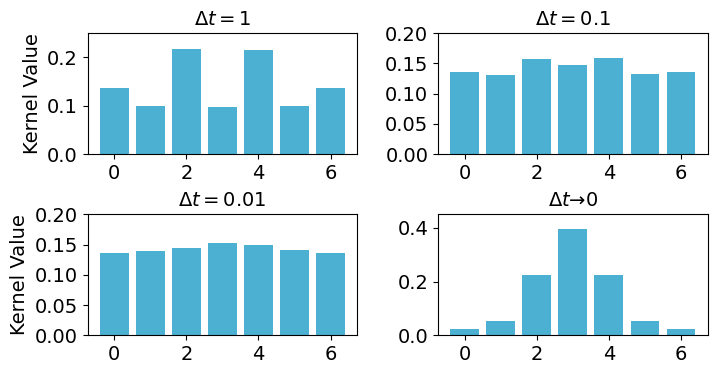

In [84]:
'看模型参数'
# s_group_data = 5
kernel_size = 7
plt.figure(figsize=(8,4),dpi=100)
plt.subplots_adjust(wspace=0.3,hspace=0.5)
# dic = {1:1,3:0.1,5:0.04,10:0.01,'continue':0}
dic = {1:1,3:0.1,10:0.01,'continue':0}
seed = 2050
for idx,(i,v) in enumerate(dic.items()):
    plt.subplot(2,2,idx+1)
    if idx < len(dic)-1:
        title = r'$\Delta t=$'+f'{v}'
        model = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={i}_k={kernel_size}_{seed}.pth')
    else:
        title = r'$\Delta t \to $'+f'{v}'
        model = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_2050.pth')
    for j,param in enumerate(model.parameters()):
#         print(idx)
#         print(F.softmax(param,dim=-1))
        plt.bar(range(kernel_size),F.softmax(param[0,0,:],dim=-1).detach(),color=colors[3])
        plt.title(title,fontsize=fontsize)
        if idx == 0:
            set_plot_basicinf(r'Kernel Value',r'',fontsize)
        elif idx == 1:
            set_plot_basicinf(r'',r'',fontsize)
        elif idx == 2:
            set_plot_basicinf(r'Kernel Value',r'',fontsize)
        else:
            set_plot_basicinf(r'',r'',fontsize)
        if idx == 0:
            plt.ylim(0,0.25)
        elif idx == len(dic)-1:
            plt.ylim(0,0.45)
        else:
            plt.ylim(0,0.2)
#             plt.yticks([0,0.05,0.100,0.150,0.200])
#         else:
#             plt.ylim(0,0.45)
# plt.suptitle(r'(a) Learned Kernel for Different $\Delta t$',fontsize=fontsize,fontweight='bold')
plt.show()

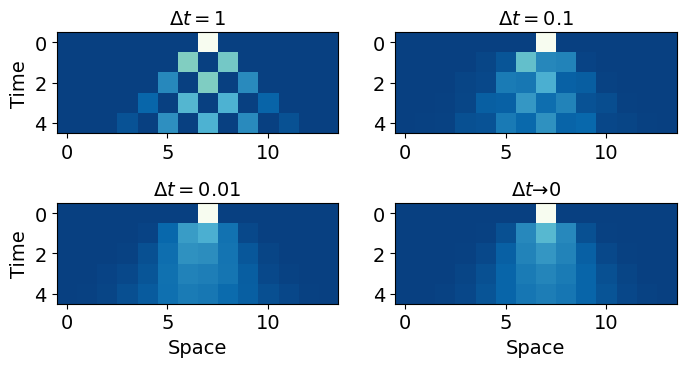

In [85]:
'可视化数据'
import matplotlib.gridspec as gridspec
dic = {
#     'unself':'unself',
        1:1,
       3:0.1,
#        5:0.04,
       10:0.01,
       'continue':0}
# dic = {1:1,3:0.1,5:0.04,10:0.01}
sgroup = 2
tgroup = 4
seed = 2050
plt.figure(figsize=(8,4),dpi=100)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
# gs = gridspec.GridSpec(1, 6, width_ratios=[1, 1, 1, 1, 1, 0.05])
# gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1, 1, 1, 1])
for idx,(i,v) in enumerate(dic.items()):
#     print(idx)
    plt.subplot(2,2,idx+1)
#     if idx == 0:
#         title = r'$R(c) \neq 0$'
#         with open(f'./data/diffusion_process_1d_field_unself_center.pkl','rb') as f:
#             data = pkl.load(f)[:20,:,:] #b*t*L
    if idx < len(dic)-1:
        title = r'$\Delta t=$'+f'{v}'
        with open(f'./data/diffusion_process_1d_discrite_macro_s_group={i}_center.pkl','rb') as f:
            data = pkl.load(f)[:20,:,:] #b*t*L
    else:
        title = r'$\Delta t \to $'+f'{v}'
        data = pt.unsqueeze(0)
    plt.title(title,fontsize=fontsize)
    if idx == 0:
        set_plot_basicinf(r'Time','',fontsize)
    elif idx == 2:
        set_plot_basicinf(r'Time','Space',fontsize)
    elif idx == 1:
        set_plot_basicinf(r'','',fontsize)
    elif idx == 3:
        set_plot_basicinf(r'','Space',fontsize)
    plt.imshow(data[0,:5,43:57],cmap='GnBu_r',vmin=0,vmax=1)
    plt.xticks([0,5,10])

# cbar_ax = plt.subplot(gs[-1])
# plt.colorbar(cax,cax=cbar_ax)
# set_plot_basicinf(r'','',fontsize)
# plt.tight_layout()
# plt.suptitle(r'(a) Visualization of Data for Different $\Delta t$',fontsize=fontsize,fontweight='bold')
plt.show()

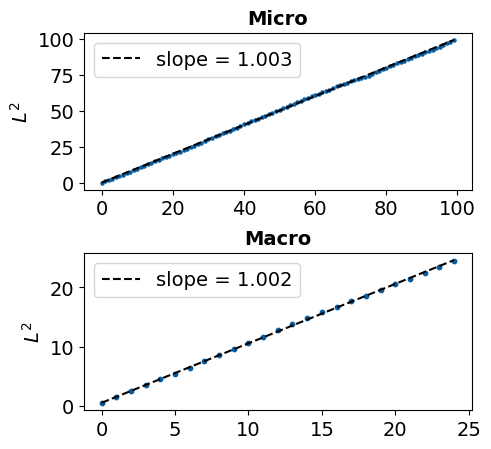

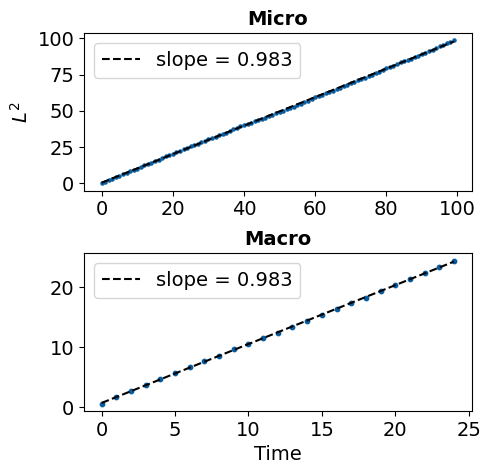

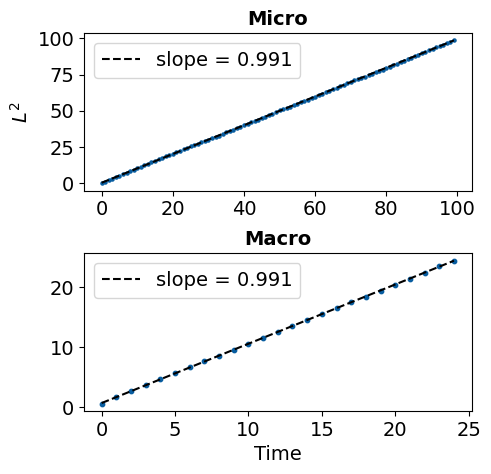

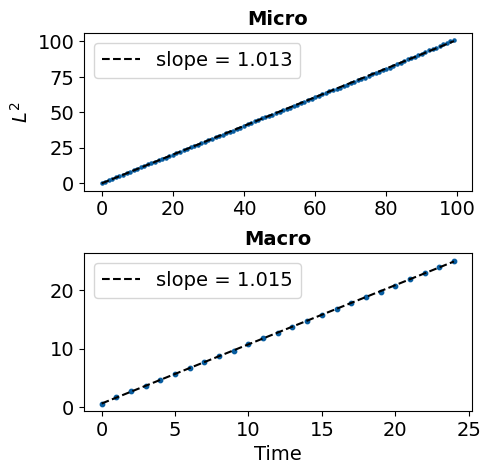

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


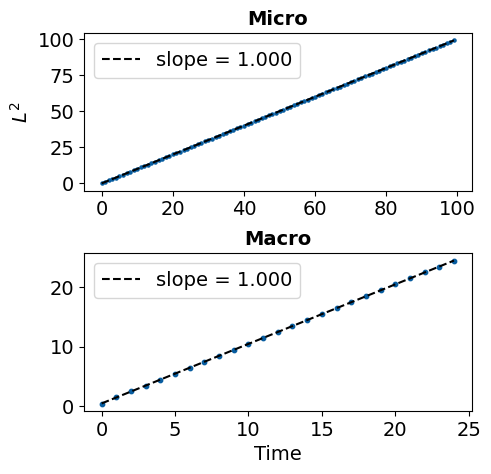

In [86]:
def get_distance_VS_t(data):
    b,steps,L = data.shape
    center = L // 2
    msds = np.zeros([b,steps])
#     print(msds.shape)
    for b in range(data.shape[0]):
        msds[b,:] = np.array([np.sum((abs(np.where(data[b,i,:]!= 0)[0]-center)**2)*data[b,i, np.where(data[b,i,:]!= 0)[0]]) for i in range(data.shape[1])])
#     print(msds.shape)
    return steps,msds
'看t vs <L>**2的关系'
dic = {1:1,3:0.1,5:0.04,10:0.01,'continue':0}
# dic = {1:1,3:0.1,5:0.04,10:0.01}
sgroup = 2
tgroup = 4
seed = 2050

# plt.subplots_adjust(hspace=0.5)
for idx,(i,v) in enumerate(dic.items()):
    plt.figure(figsize=(5,5),dpi=100)
    plt.subplots_adjust(hspace=0.4)
    plt.subplot(211)
    if idx < 4:
        with open(f'./data/diffusion_process_1d_discrite_macro_s_group={i}_center.pkl','rb') as f:
            data = pkl.load(f)[:10,:,:] #b*t*L
        model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={i}_{seed}.pth')
    else:
        data = pt.unsqueeze(0)
        model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}.pth')
    steps,msds = get_distance_VS_t(np.array(data))
    yy = np.mean(msds,axis=0)
    plt.scatter(range(steps), yy,s=1)
    
    slope, intercept, r_value, p_value, std_err = linregress(range(steps), yy[:steps])
    plt.scatter(range(steps), yy[:steps],color=colors[0],s=5)
    plt.plot(range(steps), range(steps) * slope + intercept, '--',color='k',label=f'slope = {slope:.3f}')
#     if idx == 0:
    set_plot_basicinf(r'$L^2$','',fontsize)
#     else:
#         set_plot_basicinf(r'','Time',fontsize)
    plt.title('Micro',fontsize=fontsize,fontweight='bold')
    plt.legend(fontsize=fontsize,loc=2)
    
    
    
    plt.subplot(212)
    data = torch.tensor(data,dtype=torch.float)
    encoder = model.Encoder(data)
    steps,msds = get_distance_VS_t(np.array(encoder.detach()))
    yy = np.mean(msds,axis=0)
    plt.scatter(range(steps), yy,s=1)
    
    slope, intercept, r_value, p_value, std_err = linregress(range(steps), yy[:steps])
    plt.scatter(range(steps), yy[:steps],color=colors[0],s=10)
    plt.plot(range(steps), range(steps) * slope + intercept, '--',color='k',label=f'slope = {slope:.3f}')
#     set_plot_basicinf(r'$L^2$','Time',fontsize)
    if idx == 0:
        set_plot_basicinf(r'$L^2$','',fontsize)
    else:
        set_plot_basicinf(r'','Time',fontsize)
    plt.title('Macro',fontsize=fontsize,fontweight='bold')
    plt.legend(fontsize=fontsize)
    plt.show()



In [87]:
'动力学预测准确度'
MAE = nn.L1Loss()
# dic = {'unself':'unself',1:1,3:0.1,5:0.04,10:0.01,'continue':0}
dic = {1:1,3:0.1,5:0.04,10:0.01,'continue':0}
# dic = {1:1,3:0.1,5:0.04,10:0.01}
kernel_size = 7
sgroup = 2
tgroup = 4
seed = 2050
# plt.figure(figsize=(20,6),dpi=100)
# plt.subplots_adjust(wspace=0.25,hspace=0.3)
dynamic_maes = []
coarse_maes = []
decoder_maes = []
for idx,(i,v) in enumerate(dic.items()):
#     if idx == 0:
#         with open(f'./data/diffusion_process_1d_field_unself_center.pkl','rb') as f:
#             data = pkl.load(f)[:10,:,:] #b*t*L
# #         model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={i}_{seed}.pth')
#         dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_unself_{seed}.pth')
    if idx < len(dic)-1:
        with open(f'./data/diffusion_process_1d_discrite_macro_s_group={i}_center.pkl','rb') as f:
            data = pkl.load(f)[:10,:,:] #b*t*L
        model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={i}_{seed}.pth')
        dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={i}_k={kernel_size}_{seed}.pth')
    elif idx == len(dic)-1:
        data = pt.unsqueeze(0)
        model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}.pth')
        dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')
    print(idx,data.shape)
    data = torch.tensor(data[0,:,:],dtype=torch.float)
    pred = dynamic(data)
    index = np.where(pred[1:].view(-1)!=0)[0]
    mae = MSE((data[1:].view(-1))[index],(pred[:-1].view(-1))[index]).item()
    print(mae)
    dynamic_maes.append(mae)
    
    
    'single单步粗粒化'
    encoder = model.Encoder(data.unsqueeze(0))
    macro_preds = dynamic(encoder[0,:,:])
   
    mae = MAE((macro_preds[:-1].reshape(-1)),(encoder[0,1:,:].reshape(-1))).item()
    coarse_maes.append(mae)
    
    'decoder'
    decoder = model.Decoder(macro_preds.unsqueeze(0))
#     print(decoder.shape)
    mae = MSE((decoder[0,:-1].reshape(-1)),(data[1:,:].reshape(-1))).item()
    decoder_maes.append(mae)


0 (10, 100, 100)
0.00044212082866579294
1 (10, 100, 100)
0.00014242593897506595
2 (10, 100, 100)
7.87645039963536e-05
3 (10, 100, 100)
5.9662186686182395e-05
4 torch.Size([1, 100, 100])
2.359479935876152e-07


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [88]:
macro_preds.shape

torch.Size([25, 50])

In [89]:
colors = sns.color_palette('GnBu_r',6)#GnBu_r.autumn
colors

[(0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042)]

In [90]:
coarse_maes

[0.003294609487056732,
 0.003591337939724326,
 0.0032583645079284906,
 0.0034842626191675663,
 0.00034428294748067856]

In [91]:
colors

[(0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042)]

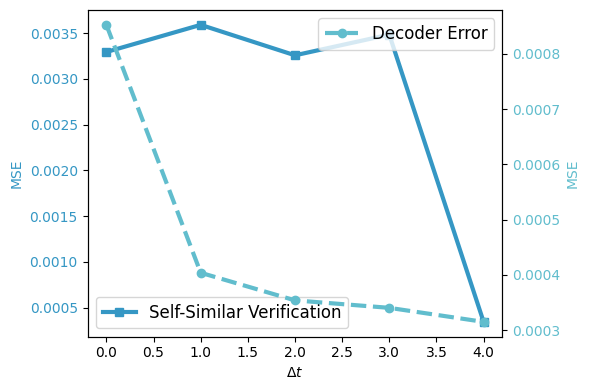

In [93]:
# plt.figure(dpi=100)
fig, ax1 = plt.subplots(dpi=100)
x = range(len(coarse_maes))
y1 = coarse_maes
y2 = decoder_maes
# 绘制第一个数组

# color = 'tab:blue'
color_index = 1
ax1.set_xlabel(r'$\Delta t$')
ax1.set_ylabel('MSE', color=colors[color_index])
ax1.plot(x, y1, color=colors[color_index],marker='s',linewidth=3,label='Self-Similar Verification')
ax1.tick_params(axis='y', labelcolor=colors[color_index])
ax1.legend(fontsize=fontsize-2)
# 使用twinx()创建第二个纵坐标轴
color_index = 2
ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color=colors[color_index])
ax2.plot(x, y2, color=colors[color_index],marker='o',linestyle='--',linewidth=3,label='Decoder Error')
ax2.tick_params(axis='y', labelcolor=colors[color_index])
# set_plot_basicinf(r'MAE',r'$\Delta t$',fontsize)
ax2.legend(fontsize=fontsize-2)
fig.tight_layout()
plt.show()


In [103]:
coarse_maes

[0.003294609487056732,
 0.003591337939724326,
 0.0032583645079284906,
 0.0034842626191675663,
 0.00034428294748067856]

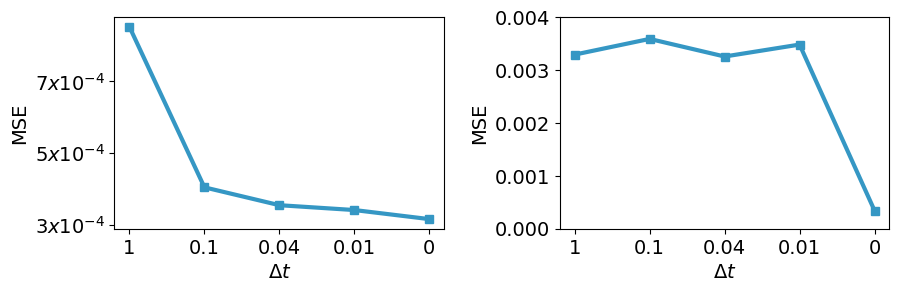

In [102]:
dic = {1:1,3:0.1,5:0.04,10:0.01,'continue':0}
plt.figure(dpi=100,figsize=(10,2.8))
plt.subplots_adjust(wspace=0.35)
plt.subplot(122)
# plt.bar(range(len(coarse_maes)),coarse_maes,color=colors[3],alpha=0.8)
plt.plot(range(len(coarse_maes)),coarse_maes,color=colors[1],marker='s',linewidth=3)
# plt.plot([0,4],[0.0199997927,0.0199997927],'--')
label=[str(v) for k,v in dic.items()]
plt.xticks(range(len(coarse_maes)),label)
set_plot_basicinf(r'MSE',r'$\Delta t$',fontsize)
plt.ylim(0,0.004)
plt.yticks([0,0.001,0.002,0.003,0.004])
# plt.yscale('log')
# plt.show()
plt.subplot(121)
# plt.figure(dpi=100)
# plt.bar(range(len(decoder_maes)),decoder_maes,color=colors[3],alpha=0.8)
plt.plot(range(len(decoder_maes)),decoder_maes,color=colors[1],marker='s',linewidth=3)
label=[str(v) for k,v in dic.items()]
plt.xticks(range(len(coarse_maes)),label)
# plt.yscale('log')
set_plot_basicinf(r'MSE',r'$\Delta t$',fontsize)
plt.yticks([3e-4,5e-4,7e-4],[r'$3x10^{-4}$',r'$5x10^{-4}$',r'$7x10^{-4}$'])
# plt.yscale('log')
plt.show()

In [212]:
    
# 参数设置
T = 96 # 总时间
dt = 1  # 时间步长
steps = int(T/dt)
space = np.arange(0,98,1)
D =0.5
L = len(space)
pt = np.zeros([steps,L])
center = np.random.randint(40,60)
print(L,center)
pt[0,center] = 1
for step in range(steps-1):
    step = step+1
    pt[step,:] = 1/(np.sqrt(4*np.pi*D*step)) * np.exp(-(space-center)**2/(4*D*step))

pt = torch.tensor(pt,dtype=torch.float)
test_data = pt

98 44


1
torch.Size([96, 98]) torch.Size([1, 23, 49])


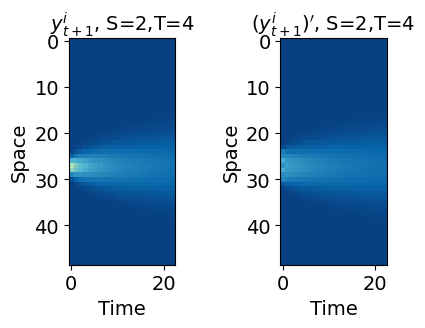

3
torch.Size([96, 98]) torch.Size([1, 23, 49])


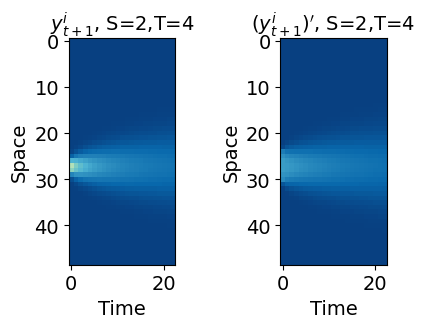

5
torch.Size([96, 98]) torch.Size([1, 23, 49])


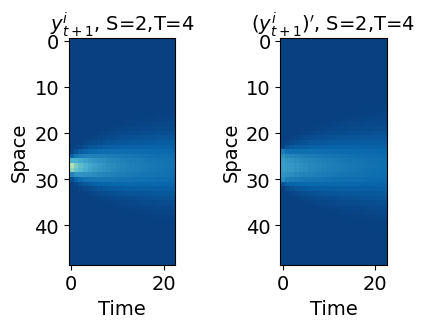

10
torch.Size([96, 98]) torch.Size([1, 23, 49])


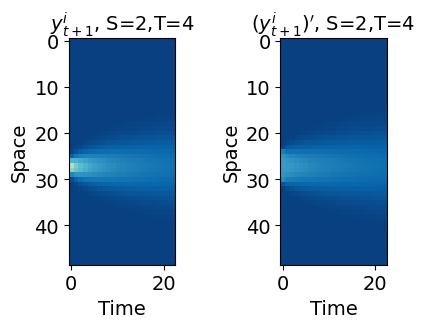

In [211]:
'自相似验证,可视化'
s_group_data = 1
for s_group_data in [1,3,5,10]:
    print(s_group_data)
    with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group_data}_center.pkl','rb') as f:
        data = pkl.load(f)[0,:,:]
    data.shape
    sgroup=2
    tgroup=4
    seed = 2050
    kernel_size=7
    model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={s_group_data}_{seed}.pth')
    # dynamic = torch.load(f'./models/diffusion_dynamic_no_norm_kernel.pth')
    dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={s_group_data}_k={kernel_size}_{seed}.pth')
    dynamic.eval()
    
    encoder = model.Encoder(test_data[:-tgroup,:].unsqueeze(0))
    encoder1 = model.Encoder(test_data[tgroup:,:].unsqueeze(0))
    print(test_data.shape,encoder.shape)
    macro_preds = dynamic(encoder[0,:,:])
    macro_preds.shape

    plt.figure(dpi=100,figsize=(5,3))
    plt.subplot(121)
    # plt.subplot(121)
    plt.imshow(encoder1[0,:,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
    set_plot_basicinf('Space','Time',fontsize)
    plt.title(r'$y^i_{t+1}$'+f', S={sgroup},T={tgroup}',fontsize=fontsize)
    # plt.show()
    # plt.figure(dpi=100)
    plt.subplot(122)
    plt.imshow(macro_preds.detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
    set_plot_basicinf('Space','Time',fontsize)
    plt.title(r"$(y^i_{t+1})'$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
    plt.show()
    


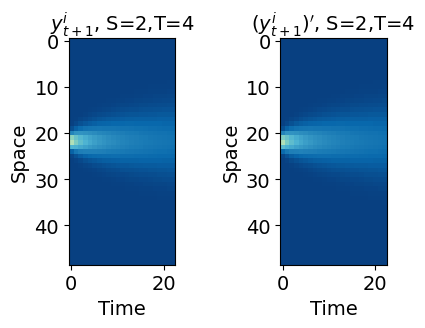

In [213]:
kernel_size = 5
seed = 2050
model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}.pth')
    # dynamic = torch.load(f'./models/diffusion_dynamic_no_norm_kernel.pth')
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')
dynamic.eval()
plt.figure(dpi=100,figsize=(5,3))
plt.subplot(121)

encoder = model.Encoder(pt[:-4,:].unsqueeze(0))
encoder1 = model.Encoder(pt[4:,:].unsqueeze(0))
plt.imshow(encoder1[0,:,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'$y^i_{t+1}$'+f', S={sgroup},T={tgroup}',fontsize=fontsize)
# plt.show()
# plt.figure(dpi=100)
plt.subplot(122)
macro_preds = dynamic(encoder[0,:,:])
plt.imshow(macro_preds.detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"$(y^i_{t+1})'$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()


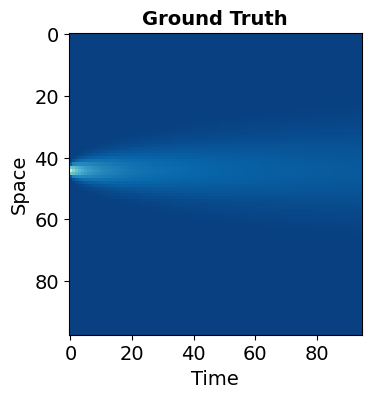

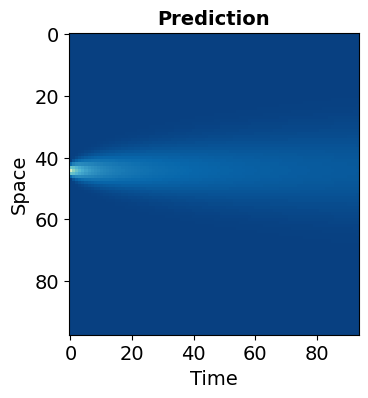

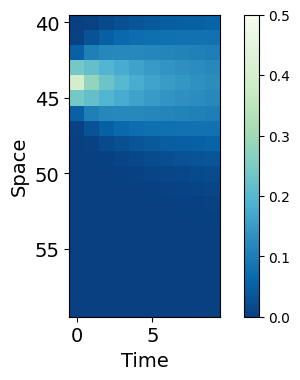

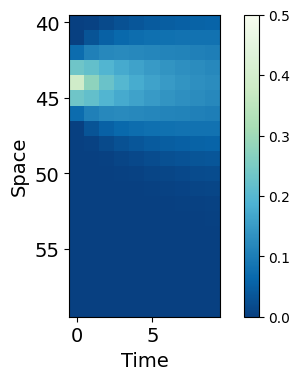

In [214]:
###### kernel_size = 5
seed = 2050
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')
dynamic.eval()
plt.figure(dpi=100)
# plt.subplot(121)
pred = dynamic(pt[:-1,:])
plt.imshow(pt[1:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"Ground Truth",fontsize=fontsize,fontweight='bold')
plt.figure(dpi=100)
# plt.subplot(122)
plt.imshow(pred[:-1].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"Prediction",fontsize=fontsize,fontweight='bold')
# plt.title(r"$P ({X}_{0:t_m})$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()

kernel_size = 5
seed = 2050
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')
dynamic.eval()
plt.figure(dpi=100)
# plt.subplot(121)
pred = dynamic(pt[:-1,:])
plt.imshow(pt[1:11,40:60].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
# plt.title(r"Ground Truth",fontsize=fontsize,fontweight='bold')
plt.yticks([0,5,10,15],[40,45,50,55])
plt.colorbar()
plt.figure(dpi=100)
# plt.subplot(122)
plt.imshow(pred[:10,40:60].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
# plt.title(r"Prediction",fontsize=fontsize,fontweight='bold')
plt.yticks([0,5,10,15],[40,45,50,55])
plt.colorbar()
# plt.title(r"$P ({X}_{0:t_m})$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()


1


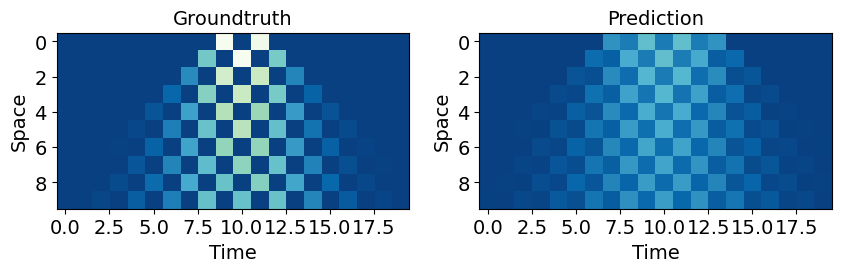

3


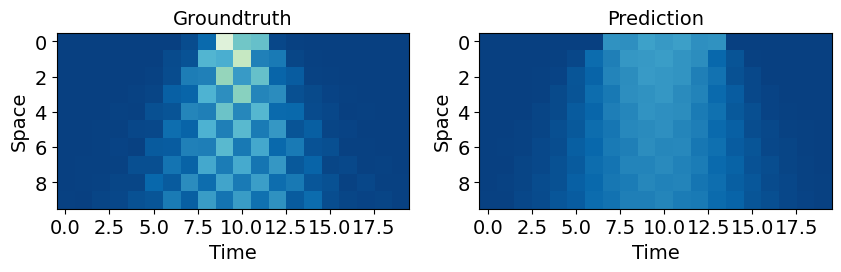

5


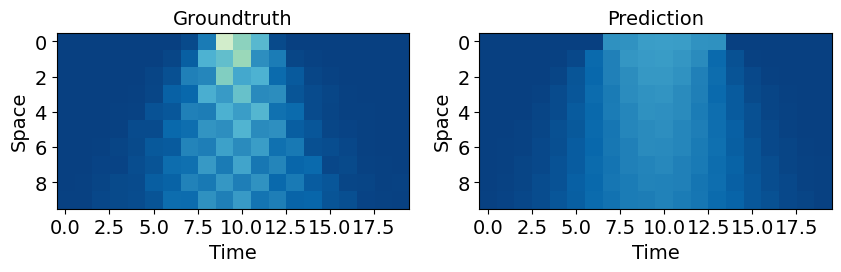

10


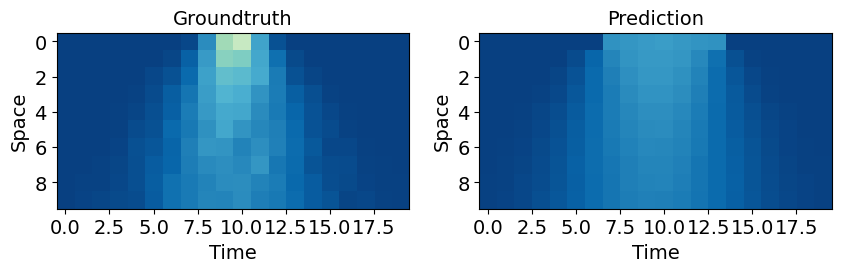

In [215]:
'single单步动力学预测，可视化'
s_group_data = 1
for s_group_data in [1,3,5,10]:
    print(s_group_data)
    with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group_data}_center.pkl','rb') as f:
        data = pkl.load(f)[0,:,:]
    data.shape
    sgroup=2
    tgroup=4
    seed = 2050
    kernel_size=7
    model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_sgroup_data={s_group_data}_{seed}.pth')
    # dynamic = torch.load(f'./models/diffusion_dynamic_no_norm_kernel.pth')
    dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_s_group={s_group_data}_k={kernel_size}_{seed}.pth')
    dynamic.eval()
    data = torch.tensor(data,dtype=torch.float)
    'single step 预测'
    pred = dynamic(data)

    plt.figure(dpi=100,figsize=(10,3))
    plt.subplot(121)
    # plt.subplot(121)
    plt.imshow(data[1:11,40:60].detach(),cmap='GnBu_r',vmin=0,vmax=0.5)
    set_plot_basicinf('Space','Time',fontsize)
    plt.title(r'Groundtruth',fontsize=fontsize)
    # plt.show()
    # plt.figure(dpi=100)
    plt.subplot(122)
    plt.imshow(pred[:10,40:60].detach(),cmap='GnBu_r',vmin=0,vmax=0.5)
    set_plot_basicinf('Space','Time',fontsize)
    plt.title(r"Prediction",fontsize=fontsize)
    plt.show()


In [216]:
kernel_size = 5
seed = 2050
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')

In [217]:
'single step 预测'

pred = dynamic(test_data)
test_data.shape,pred.shape

(torch.Size([96, 98]), torch.Size([96, 98]))

In [218]:
print('1 step MAE: ',torch.mean(abs(pred[:-1,:].detach()-test_data[1:,:].detach())))

1 step MAE:  tensor(2.0318e-05)


In [219]:
'muti step 预测'
pred_steps = 100
L=100
multi_pred = torch.zeros(test_data.shape)
multi_pred[0:1,:] = dynamic(test_data[0:1,:])
for step in range(pred_steps):
    multi_pred[step+1:step+2,:] = dynamic(multi_pred[step:step+1,:])


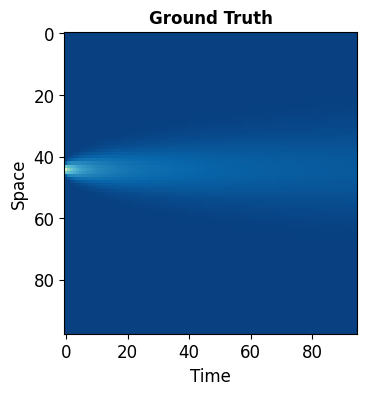

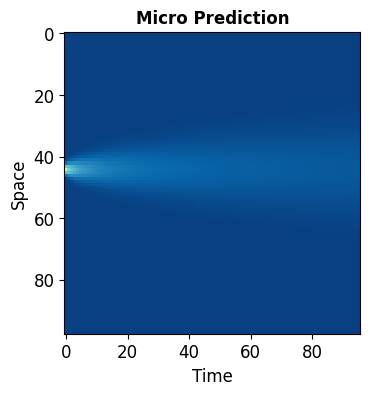

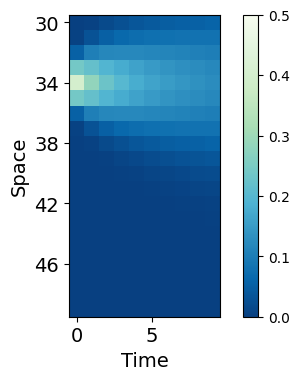

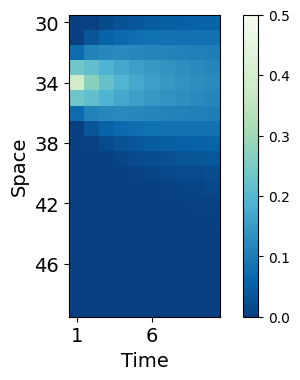

In [220]:
plt.figure(dpi=100)
fontsize=12
# cmap = mpl.colors.ListedColormap(colors)
# plt.subplot(121)
plt.imshow(test_data[1:,:].T,cmap='GnBu_r',vmin=0,vmax=0.5)
# plt.colorbar()
plt.title('Data')
set_plot_basicinf('Space','Time',fontsize)
plt.title('Ground Truth',fontsize=fontsize,fontweight='bold')

plt.figure(dpi=100)
plt.imshow(multi_pred.detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title('Micro Prediction',fontsize=fontsize,fontweight='bold')
# plt.colorbar()
plt.show()


plt.figure(dpi=100)
# cmap = mpl.colors.ListedColormap(colors)
# plt.subplot(121)
fontsize=14
plt.imshow(test_data[1:11,40:60].T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.yticks(np.arange(0,20,4),[str(i) for i in np.arange(30,50,4)])
# plt.title('Data',fontsize=fontsize,fontweight='bold')
# plt.subplot(122)
plt.figure(dpi=100)
plt.imshow(multi_pred.detach()[:10,40:60].T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
plt.yticks(np.arange(0,20,4),[str(i) for i in np.arange(30,50,4)])
plt.xticks([0,5],['1','6'])
set_plot_basicinf('Space','Time',fontsize)
# plt.title('Micro Prediction',fontsize=fontsize,fontweight='bold')
# plt.colorbar()
plt.show()




In [221]:
test_data.shape,multi_pred.shape

(torch.Size([96, 98]), torch.Size([96, 98]))

In [222]:
print('100 step MAE: ',torch.mean(abs(multi_pred[:-1,:].detach()-test_data[1:,:].detach())))

100 step MAE:  tensor(0.0002)


torch.Size([96, 98]) torch.Size([1, 23, 49])
torch.Size([23, 49])
torch.Size([1, 92, 98])


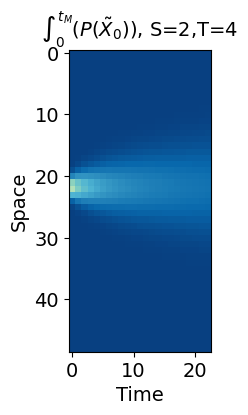

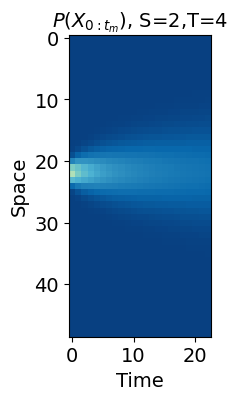

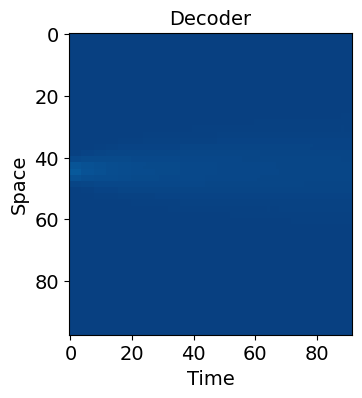

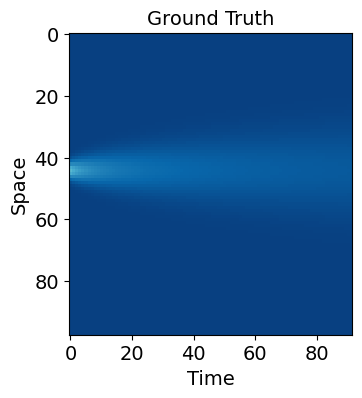

In [226]:
'single单步粗粒化'
encoder = model.Encoder(test_data[:-4,:].unsqueeze(0))
encoder1 = model.Encoder(test_data[4:,:].unsqueeze(0))
print(test_data.shape,encoder.shape)
macro_preds = dynamic(encoder[0,:,:])
decoder = model.Decoder(macro_preds.unsqueeze(0))

print(macro_preds.shape)
print(decoder.shape)

plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(encoder1[0,:,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'$\int_0^{t_M}(P (\tilde{X}_0))$'+f', S={sgroup},T={tgroup}',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(macro_preds.detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"$P ({X}_{0:t_m})$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()

plt.figure(dpi=100)
plt.imshow(decoder.detach()[0,:,:].T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Timxze',fontsize)
plt.title(r'Decoder',fontsize=fontsize)
plt.show()

plt.figure(dpi=100)
plt.imshow(test_data[4:,:].T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"Ground Truth",fontsize=fontsize)
plt.show()

In [202]:
macro_preds.shape,encoder1.shape

(torch.Size([24, 49]), torch.Size([1, 24, 49]))

In [203]:
print('MAE: ',torch.mean(abs(macro_preds.detach()-encoder1[0,:,:].detach())))

MAE:  tensor(0.0013)


In [180]:
'多步粗粒化——这还挺复杂的，涉及到宏观多步和微观多步——动力学一致性'
encoder = model.Encoder(test_data.unsqueeze(0))
encoder1 = model.Encoder(multi_pred.unsqueeze(0))
print(encoder.shape)
pred_steps = 25
macro_preds = torch.zeros(encoder.shape)[0,:,:]
b,t,l = encoder.shape
macro_preds[0:1,:] = dynamic(encoder[:,0:1,:].reshape(-1,l)).reshape(1,l)
for step in range(pred_steps):
    macro_preds[step+1:step+2] = dynamic(macro_preds[step:step+1,:])
encoder1.shape,macro_preds.shape

torch.Size([1, 25, 49])


(torch.Size([1, 25, 49]), torch.Size([25, 49]))

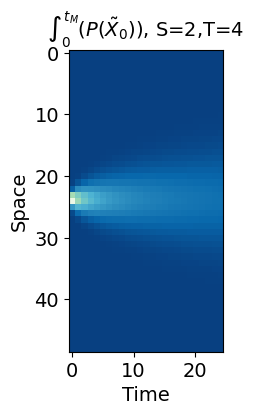

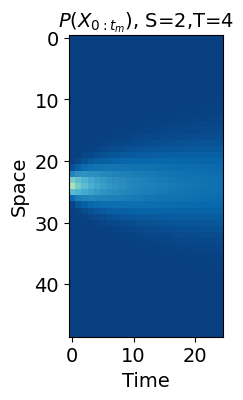

In [182]:
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(encoder1[0,:,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'$\int_0^{t_M}(P (\tilde{X}_0))$'+f', S={sgroup},T={tgroup}',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(macro_preds.detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
set_plot_basicinf('Space','Time',fontsize)
plt.title(r"$P ({X}_{0:t_m})$"+f', S={sgroup},T={tgroup}',fontsize=fontsize)
plt.show()

In [183]:
macro_preds.shape,encoder.shape

(torch.Size([25, 49]), torch.Size([1, 25, 49]))

In [184]:
print('MAE: ',torch.mean(abs(macro_preds[:,:].detach()-encoder1[0,:,:].detach())))

MAE:  tensor(0.0012)


## 对比扩散模型S和T的关系

In [12]:
sgroup = 2
tgroup = 2
seed = 2051
micro_dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k=5_{seed}.pth')
's=t=2'
model_compare = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}_k=7.pth')
's=t=4'
sgroup = 2
tgroup = 4
model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}_k=7.pth')


In [13]:
'generate test data'
'1d'
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# seed = 2050
np.random.seed(seed)
    
# 参数设置
T = 96 # 总时间
dt = 1  # 时间步长
steps = int(T/dt)
space = np.arange(0,98,1)
D = 0.5
L = len(space)
pt = np.zeros([steps,L])
center = 40
print(center, L)
pt[0,center] = 1
for step in range(steps-1):
    step = step+1
    pt[step,:] = 1/(np.sqrt(4*np.pi*D*step)) * np.exp(-(space-center)**2/(4*D*step))
pt = torch.tensor(pt,dtype=torch.float)
pt.shape

40 98


torch.Size([96, 98])

torch.Size([96, 98]) torch.Size([1, 48, 49])
torch.Size([48, 49])
torch.Size([1, 96, 98])
MAE:  tensor(0.0051)


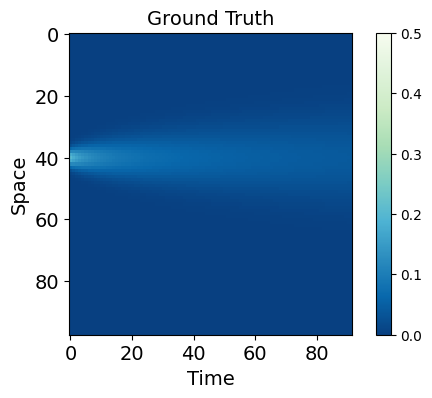

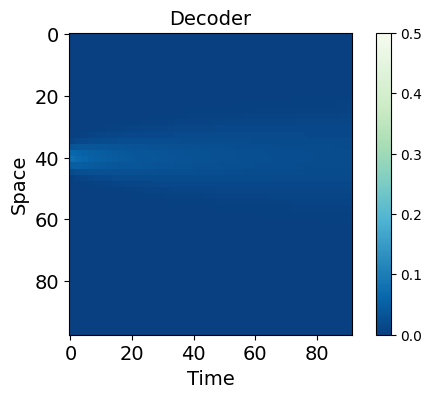

In [14]:
't=s=2对比模型'
'encoder + dynamic + decoder'
encoder = model_compare.Encoder(pt.unsqueeze(0))
print(pt.shape,encoder.shape)
macro_preds = dynamic(encoder[0,:,:])
print(macro_preds.shape)
decoder = model_compare.Decoder(macro_preds.unsqueeze(0))
print(decoder.shape)
'decoder mae'

print('MAE: ',torch.mean(abs(decoder[0,2:-2,:].detach()-pt[4:,:])))



fontsize = 14
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(pt[4:,:].T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Ground Truth',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(decoder[0,2:-2,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Decoder',fontsize=fontsize)

plt.show()



torch.Size([96, 98]) torch.Size([1, 24, 49])
torch.Size([24, 49])
torch.Size([1, 96, 98])
MAE:  tensor(0.0077)


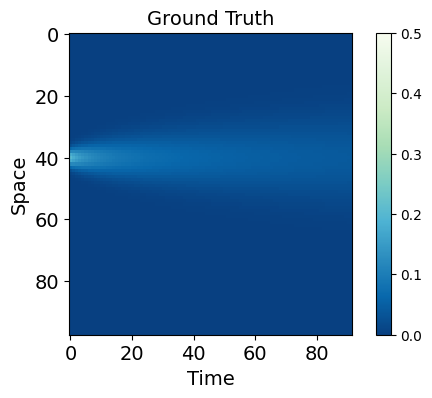

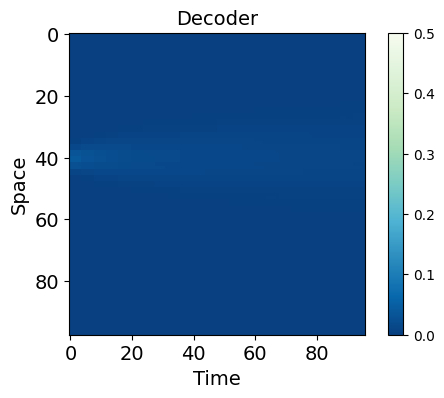

In [272]:
't=4,s=2对比模型'
'encoder + dynamic + decoder'
encoder = model.Encoder(pt.unsqueeze(0))
print(pt.shape,encoder.shape)
macro_preds = dynamic(encoder[0,:,:])
print(macro_preds.shape)
decoder = model.Decoder(macro_preds.unsqueeze(0))
print(decoder.shape)
'decoder mae'
print('MAE: ',torch.mean(abs(decoder[0,:-4,:].detach()-pt[4:,:])))


fontsize = 14
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(pt[4:,:].T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Ground Truth',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(decoder[0,:,:].detach().T,cmap='GnBu_r',vmin=0,vmax=0.5)
plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Decoder',fontsize=fontsize)
plt.show()


## 对比自相似和非自相似架构准确度

In [104]:
sgroup = 2
tgroup = 4
kernel_size=5
seed = 2051
dynamic = torch.load(f'./models/dynamic/diffusion_dynamic_k={kernel_size}_{seed}.pth')
'非自相似'
model = torch.load(f'../../diffusion/models/diffusion_encoder_macro_unself_sgroup={sgroup}_tgroup={tgroup}_{seed}_k={kernel_size}.pth')
model_unself = model['encoder']
macro_dynamic = model['macro_dynamic']
'自相似'
model = torch.load(f'./models/encoder/diffusion_encoder_sgroup={sgroup}_tgroup={tgroup}_{seed}_k={kernel_size}.pth')

In [105]:
model_unself,model

(TemporalSpatialConv(
   (softmax): Softmax(dim=-1)
 ),
 TemporalSpatialConv(
   (softmax): Softmax(dim=-1)
 ))

In [106]:
loss_kl = torch.nn.KLDivLoss(reduction='batchmean')

In [15]:
'generate test data'
'1d'
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# seed = 2050
np.random.seed(seed)
    
# 参数设置
T = 96 # 总时间
dt = 1  # 时间步长
steps = int(T/dt)
space = np.arange(0,98,1)
D = 0.5
L = len(space)
pt = np.zeros([steps,L])
center = 40
print(center, L)
pt[0,center] = 1
for step in range(steps-1):
    step = step+1
    pt[step,:] = 1/(np.sqrt(4*np.pi*D*step)) * np.exp(-(space-center)**2/(4*D*step))
pt = torch.tensor(pt,dtype=torch.float)
pt.shape

40 98


torch.Size([96, 98])

torch.Size([96, 98]) torch.Size([1, 24, 49])
torch.Size([24, 49])
torch.Size([1, 96, 98])
MAE:  tensor(0.0077)
KL tensor(1.3918)


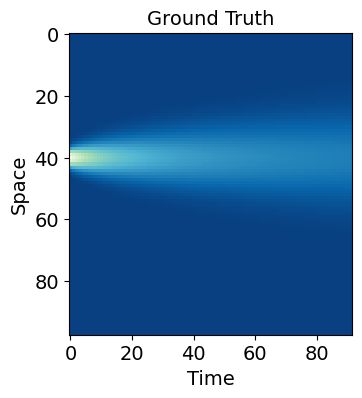

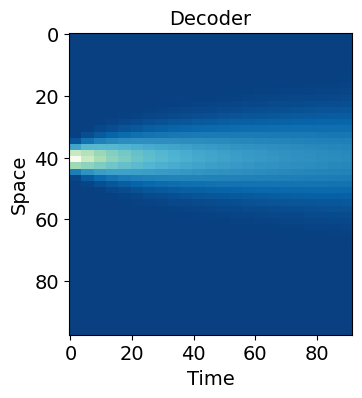

In [16]:
NEAR_ZERO = 1e-10
'encoder + dynamic + decoder'
encoder = model_unself.Encoder(pt.unsqueeze(0))
print(pt.shape,encoder.shape)
macro_preds = macro_dynamic(encoder[0,:,:])
print(macro_preds.shape)
decoder = model_unself.Decoder(macro_preds.unsqueeze(0))
print(decoder.shape)
b,t,l = decoder.shape
print('MAE: ',torch.mean(abs(decoder[0,:-4,:].detach()-pt[4:,:])))
print('KL',loss_kl(torch.log(decoder[0,:-4,:].detach().reshape(-1,l)+NEAR_ZERO),pt[4:,:].reshape(-1,l)))


fontsize = 14
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(pt[4:,:].T,cmap='GnBu_r')
# plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Ground Truth',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(decoder[0,:-4,:].detach().T,cmap='GnBu_r')
# plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Decoder',fontsize=fontsize)
plt.show()
# print('MAE: ',torch.sum(abs(decoder[0,:,:].detach()[pt[2:,:]!=0]-pt[2:,:][pt[2:,:]!=0])))


torch.Size([1, 1, 5]) tensor([[[0.0720, 0.2342, 0.3877, 0.2342, 0.0720]]],
       grad_fn=<SoftmaxBackward0>)
torch.Size([1, 1, 5]) tensor([[[0.0695, 0.2311, 0.4057, 0.2172, 0.0764]]],
       grad_fn=<SoftmaxBackward0>)


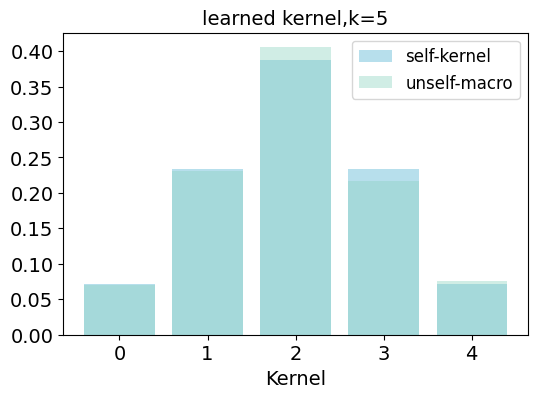

In [17]:
colors = sns.color_palette('GnBu_r',10)
colors

plt.figure(dpi=100)

'visualiza the learned kernel'
for idx,param in enumerate(dynamic.parameters()):
    print(param.shape,F.softmax(param,dim=-1))
    plt.bar(range(kernel_size),F.softmax(param[0,0,:],dim=-1).detach(),color=colors[3],alpha=0.4,label='self-kernel')


for idx,param in enumerate(macro_dynamic.parameters()):
    print(param.shape,F.softmax(param,dim=-1))
    plt.bar(range(kernel_size),F.softmax(param[0,0,:],dim=-1).detach(),color=colors[5],alpha=0.4,label='unself-macro')
  
plt.title(f'learned kernel,k={kernel_size}',fontsize=fontsize)
plt.legend(fontsize=fontsize-2)
set_plot_basicinf('','Kernel',fontsize)
plt.show()


torch.Size([96, 98]) torch.Size([1, 24, 49])
torch.Size([24, 49])
torch.Size([1, 96, 98])
MAE:  tensor(0.0077)
KL tensor(1.3917)


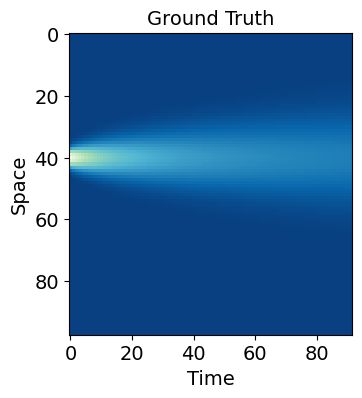

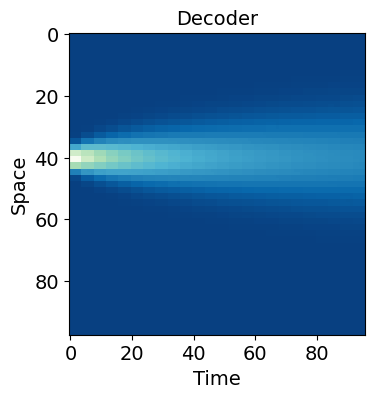

In [18]:
'encoder + dynamic + decoder'
encoder = model.Encoder(pt.unsqueeze(0))
print(pt.shape,encoder.shape)
macro_preds = dynamic(encoder[0,:,:])
print(macro_preds.shape)
decoder = model.Decoder(macro_preds.unsqueeze(0))
print(decoder.shape)
b,t,l = decoder.shape
'decoder mae'
print('MAE: ',torch.mean(abs(decoder[0,:-4,:].detach()-pt[4:,:])))
print('KL',loss_kl(torch.log(decoder[0,:-4,:].detach().reshape(-1,l)+NEAR_ZERO),pt[4:,:].reshape(-1,l)))

fontsize = 14
plt.figure(dpi=100)
# plt.subplot(121)
plt.imshow(pt[4:,:].T,cmap='GnBu_r')
# plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Ground Truth',fontsize=fontsize)
# plt.show()
plt.figure(dpi=100)
plt.imshow(decoder[0,:,:].detach().T,cmap='GnBu_r')
# plt.colorbar()
set_plot_basicinf('Space','Time',fontsize)
plt.title(r'Decoder',fontsize=fontsize)
plt.show()


In [107]:
'2  times experiments'
unself_losses = {}
self_losses = {}
for seed in [2050,2051,2052]:
    with open(f'./data/loss_unself_{kernel_size}_{seed}.pkl','rb') as f:
        unself_losses[seed] = pkl.load(f)
        print(len(unself_losses[seed]['valid']))
    with open(f'./data/loss_self_{kernel_size}_{seed}.pkl','rb') as f:
        self_losses[seed] = pkl.load(f)
        print(len(self_losses[seed]['valid']))
        print()

140
162

148
92

189
205



In [110]:
colors = sns.color_palette('RdYlGn_r',6)
colors

[(0.2246828143021916, 0.6558246828143023, 0.34440599769319497),
 (0.6165321030372936, 0.8359092656670511, 0.41191849288735105),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307)]

92 (3, 92)


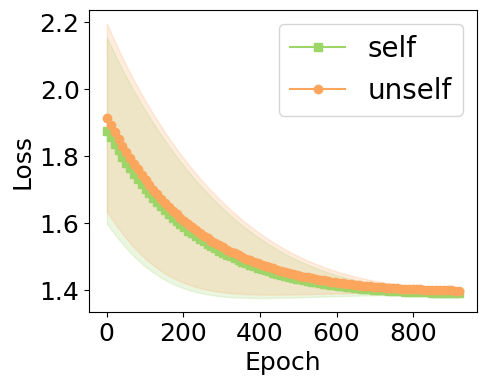

In [112]:
plt.figure(dpi=100,figsize=(5,4))
fontsize=20
cut_time = 92
xx = np.linspace(1,cut_time*10,cut_time)

yy = np.array([i['valid'][:cut_time] for i in self_losses.values()])
print(len(xx),yy.shape)
plt.plot(xx,np.mean(yy,axis=0),label='self',marker='s',color=colors[1])
plt.fill_between(xx,np.mean(yy,axis=0)-np.std(yy,axis=0),np.mean(yy,axis=0)+np.std(yy,axis=0),
                 color=colors[1],alpha=0.2)

# cut_time = 140
xx = np.linspace(1,cut_time*10,cut_time)
yy = np.array([i['valid'][:cut_time] for i in unself_losses.values()])
plt.plot(xx,np.mean(yy,axis=0),label='unself',marker='o',color=colors[4])
plt.fill_between(xx,np.mean(yy,axis=0)-np.std(yy,axis=0),np.mean(yy,axis=0)+np.std(yy,axis=0),
                 color=colors[4],alpha=0.2)
plt.legend(fontsize=fontsize)
set_plot_basicinf('Loss','Epoch',fontsize-2)
# plt.yscale('log')
plt.show()

In [5]:
import torch.nn.functional as F

class NormalizedConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size,padding,padding_mode):
        super(NormalizedConv1d, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding, padding_mode, bias=False)
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, x):
        # 对权重进行归一化
        normed_weight = self.softmax(self.conv.weight)
        return F.conv1d(x, normed_weight, self.conv.bias, stride=self.conv.stride,
                        padding=self.conv.padding, dilation=self.conv.dilation)

class Diffusion1D(nn.Module):
    def __init__(self,channel=1):
        super(Diffusion1D, self).__init__()
        kernel = 7
        #F.conv1d的padding mode只支持same和valid.valid相当于 no pad;same相当于输入和输出一样的pad
        self.normconv = NormalizedConv1d(1, channel, kernel, padding=1, padding_mode='same') 
#         self.normconv = nn.Conv1d(1, channel, 3, padding=1, bias=False) 
        
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.normconv(x.unsqueeze(1))
        x = torch.transpose(x,2,1).squeeze(-1)
        x = self.relu(x)
        return x

In [6]:


    
class TemporalSpatialConv(nn.Module):
    def __init__(self, tgroup = 4, sgroup=2):
        super(TemporalSpatialConv, self).__init__()
        self.tgroup = tgroup
        self.sgroup = sgroup
        # 空间卷积
        self.spatial_conv_weight = nn.Parameter(torch.randn(1, 1, sgroup))
        self.temporal_conv_weight = nn.Parameter(torch.randn(1, 1, tgroup))

        self.spatial_deconv_weight = nn.Parameter(torch.randn(1, 1, sgroup))
        self.temporal_deconv_weight = nn.Parameter(torch.randn(1, 1, tgroup))

        
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, x):
        return x
    def Encoder(self, x):

        # 使用Softmax进行归一化
        spatial_conv_weight_normalized = F.softmax(self.spatial_conv_weight, dim=-1)
        temporal_conv_weight_normalized = F.softmax(self.temporal_conv_weight,dim=-1)*self.sgroup

        # 手动执行卷积操作
#         print(x.shape)
        b,t,l = x.shape
        x = x.reshape(-1,1,l)
        
        x = F.conv1d(x, spatial_conv_weight_normalized, stride=self.sgroup).reshape(b,t,l//self.sgroup)
#         print(x.shape)
        x = x.permute(0,2,1)
        x = x.reshape(-1,1,t)
        x = F.conv1d(x, temporal_conv_weight_normalized, stride=self.tgroup).reshape(b,l//self.sgroup,t//self.tgroup)
        x = x.permute(0,2,1)
#         x = F.relu(x)
        return x
    def Decoder(self, x):
        
        # 使用Softmax进行归一化
        spatial_conv_weight_normalized = F.softmax(self.spatial_conv_weight, dim=-1)
        temporal_conv_weight_normalized = F.softmax(self.temporal_conv_weight,dim=-1)

        # 手动执行卷积操作
        b,t,l = x.shape
        x = x.reshape(-1,1,l)
        
        x = F.conv_transpose1d(x, spatial_conv_weight_normalized, stride=self.sgroup).reshape(b,t,l*self.sgroup)
#         print(x.shape)
        x = x.permute(0,2,1)
        x = x.reshape(-1,1,t)
        x = F.conv_transpose1d(x, temporal_conv_weight_normalized, stride=self.tgroup).reshape(b,l*self.sgroup,t*self.tgroup)
        x = x.permute(0,2,1)

        return x

### 模型多次粗粒化看结果，预测以及幂指数